In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import contextily as cx
from distinctipy import distinctipy

In [3]:
# Data from: https://artchoral.org/recensement-des-maitrises-filieres-voix-et-classes-cham/
csv_file = "choirs.csv"

In [4]:
df = pd.read_csv(
    csv_file,
    sep=";",
    encoding="ISO-8859-1",
    header=None,
    names=["name", "lat", "lon", "_"],
)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="epsg:4326")
gdf.head()

,name,lat,lon,_,geometry
0,Académie Anne de Guigné,45.96578,6.16137,NaN,POINT (6.16137 45.96578)
1,CHAM Vocale de l'Institution Saint-Alyre,45.78397,3.08487,NaN,POINT (3.08487 45.78397)
2,Choeur d'enfants Capriccio,46.99480,3.16925,NaN,POINT (3.16925 46.99480)
3,CMA Paris 18e Gustave Charpentier,48.89401,2.35026,NaN,POINT (2.35026 48.89401)
4,CRC de Givors,45.58403,4.77272,NaN,POINT (4.77272 45.58403)


In [5]:
names = list(gdf.name.unique())
nb_colors = gdf.shape[0]
print(nb_colors)
colors = distinctipy.get_colors(nb_colors)
color_mapping = dict(zip(names, colors))

55


In [6]:
west = [
    "CRD de l'agglomération du Pays de Saint-Omer",
    "Maîtrise de Seine-Maritime",
    "Manécanterie Saint Michel de Bolbec",
    "Maîtrise Saint-Évode de Rouen",
    "CRR de Caen",
    "Maîtrise des Hauts de Seine",
    "Maîtrise des Demoiselles de la Légion d honneur",
    "CMA Paris 18e Gustave Charpentier",
    "Centre de Musique Baroque de Versailles",
    "Maîtrise Notre-Dame de Paris",
    "Maîtrise de Radio France",
    "CRD Bourg-la-Reine/Sceaux /CHAM vocale",
    "CRD Saint-Brieuc",
    "Maîtrise de Bretagne",
    "Maîtrise des Pays de la Loire",
    "Maîtrise de la Perverie",
    "Maîtrise de la Cathédrale de Nantes",
    "Maîtrise Saint-Etienne de Bourges",
    "Maîtrise de Bordeaux",
    "CRR de Toulouse",
]
east = [
    "CRC de Wasquehal",
    "Maîtrise de la Cathédrale Saint-Étienne de Metz",
    "Maîtrise Ste Philomène de Haguenau",
    "CRR du Grand Nancy",
    "Maîtrise de l'Opéra national du Rhin / Petits Chanteurs de Strasbourg",
    "Maîtrise de garçons de Colmar",
    "CRD d'Auxerre",
    "CRD Pays de Montbéliard",
    "Maîtrise Saint-Etienne de Bourges",
    "Choeur d'enfants Capriccio",
    "Maîtrise de la Cathédrale d'Autun",
    "Les Petits Chanteurs à la Croix de Bois",
    "École publique élémentaire Jean Moulin",
    "Maîtrise Chalonnaise Saint Charles",
    "CRI Haut-Jura Saint-Claude",
    "CRD Mâcon",
    "Académie Anne de Guigné",
    "CHAM Vocale de l'Institution Saint-Alyre",
    "CRR de Clermont-Ferrand",
    "Les Petits Chanteurs de Lyon",
    "Les Petits Chanteurs de Saint-Marc",
    "Maîtrise de la Loire",
    "CRC de Givors",
    "Les Petits chanteurs de Saint-Étienne",
    "EIMD des Marches du Velay/Rochebaron",
    "Les Petits Chanteurs de Grenoble",
    "Maîtrise de la Cathédrale du Puy en Velay",
    "CRI Saint Flour Communauté",
    "CRI Maurice André d'Alès Agglomération",
    "Maîtrise du CRC de Grasse",
    "Les Petits chanteurs d'Aix en Provence",
    "Maîtrise des Bouches du Rhône / Pôle d Art vocal",
    "CRR Toulon-Provence-Méditerrannée",
]

In [8]:
gdf_3857 = gdf.to_crs("epsg:3857")
choir_icon_path = "music-conductor.png"
choir = plt.imread(choir_icon_path)

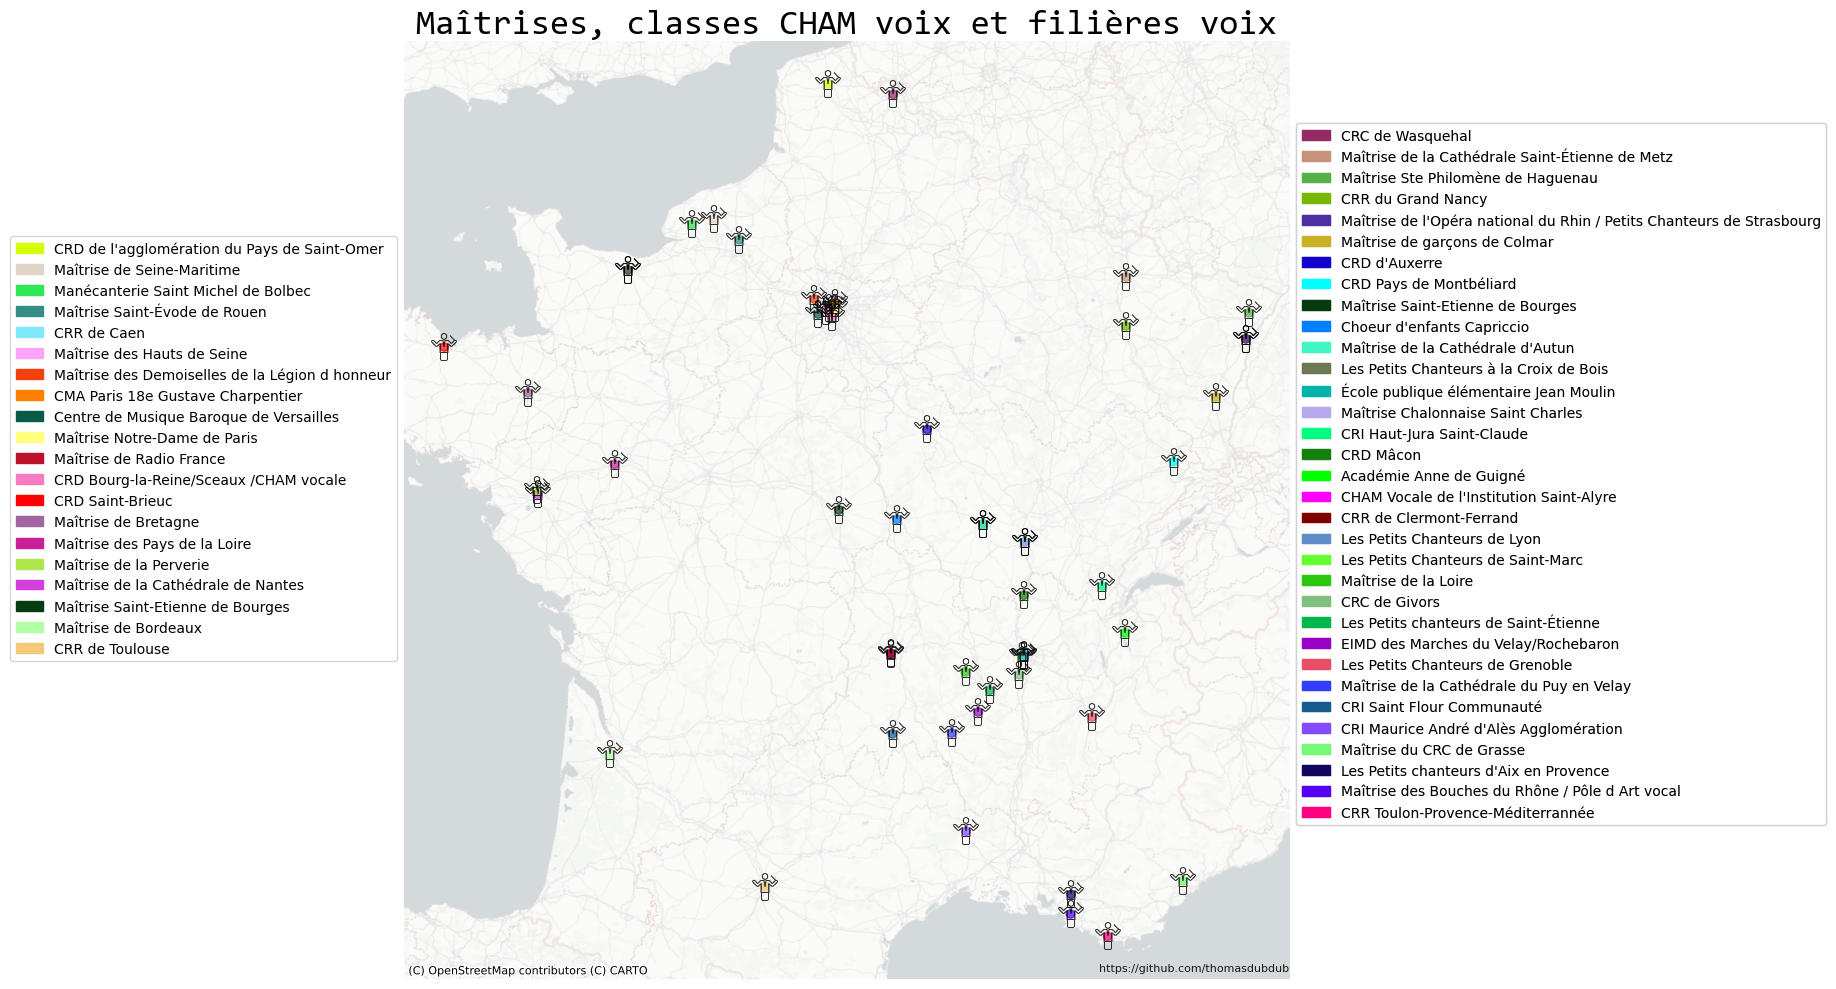

In [9]:
f, ax = plt.subplots(figsize=(16, 10))
gdf_3857.plot(ax=ax, alpha=0.7, color=gdf_3857["name"].map(color_mapping))

for x, y, name in zip(
    gdf_3857.geometry.x,
    gdf_3857.geometry.y,
    gdf_3857.name,
):
    ax.add_artist(
        AnnotationBbox(
            OffsetImage(choir, zoom=0.4, alpha=0.8),
            (x, y),
            frameon=False,
        )
    )

west_patches = [mpatches.Patch(color=color_mapping[x], label=x) for x in west]
legend1 = plt.legend(
    handles=west_patches,
    prop={"size": 10},
    bbox_to_anchor=(-0.00, 0.8),
)
east_patches = [mpatches.Patch(color=color_mapping[x], label=x) for x in east]
legend2 = plt.legend(
    handles=east_patches,
    prop={"size": 10},
    bbox_to_anchor=(1.00, 0.92),
)
ax.add_artist(legend1)
ax.add_artist(legend2)

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)
plt.title(
    "Maîtrises, classes CHAM voix et filières voix",
    fontsize=25,
    fontname="Consolas",
    color="k",
    y=1.0,
    loc="center",
)
plt.title(
    "https://github.com/thomasdubdub",
    fontsize=8,
    color="black",
    alpha=0.9,
    y=0.00,
    loc="right",
)
ax.axis("off")
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig("maitrises.png", dpi=150, bbox_inches="tight", pad_inches=0)